<a href="https://colab.research.google.com/github/raphateixeira/Filtro-SallenKey/blob/main/SallenKey_ProjetoControlador01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install control -q

In [ ]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
num = 0.8*9288;
den = [1, 337.9, 9288];
G = ct.TransferFunction(num, den)
Ts = 0.015
Gz = ct.c2d(G,Ts, method = 'zoh')


In [ ]:
Kp = 0.1
Ki = 13.2
Cz = ct.TransferFunction([Kp, Ki*Ts-Kp], [1, -1],Ts)
Cz


TransferFunction(array([0.1  , 0.098]), array([ 1, -1]), 0.015)

$$zU(z) = U(z) + KpzE(z) + (Ki*Ts-Kp)E(z)$$

$$U(z) = z^{-1}U(z) + KpE(z) + z^{-1}(Ki*Ts-Kp)E(z)$$

$$u(n) = u(n-1) + K_pe(n) + (K_i*T_s-K_p)e(n-1)$$


In [ ]:
Hz = ct.feedback(ct.series(Cz,Gz),1)
Hz

TransferFunction(array([0.02368369, 0.02836816, 0.00505497]), array([ 1.00000000e+00, -1.62208526e+00,  6.80428966e-01, -1.23687641e-03]), 0.015)

In [ ]:
np.abs(Hz.poles())

array([0.82308615, 0.82308615, 0.00182573])

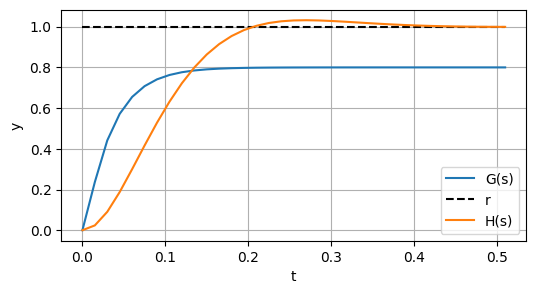

In [ ]:
tma, yma = ct.step_response(Gz,T=0.5)
tmf, ymf = ct.step_response(Hz,T = 0.5)

r = np.ones(len(tma))
plt.figure(figsize = (6,3))
plt.plot(tma,yma, label = 'G(s)')
plt.plot(tma,r, 'k--',label = 'r')
plt.plot(tmf,ymf, label = 'H(s)')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.grid(True)
plt.show()

In [ ]:
Ns = 40
t = np.linspace(0,(Ns-1)*Ts,Ns)
r = np.ones(Ns)
e = np.zeros(Ns)
u = np.zeros(Ns)
y = np.zeros(Ns)

In [ ]:
y_menos1 = 0
y_menos2 = 0
u_menos1 = 0
u_menos2 = 0

$$    u(n) =  u(n-1) + K_pe(n) +  (K_iT_s - K_p)e(n-1)$$

In [ ]:
for n in np.arange(0,Ns):
  if (n == 0):
    e[n] = r[n] - y[n]
    u[n] = Kp*e[n]
    y[n] = 0.0

  if (n == 1):
    e[n] = r[n] - y[n]
    u[n] = u[n-1] + Kp*e[n] + (Ki*Ts-Kp)*e[n-1]
    y[n] = 0.2368*u[n] + 0.6458*y[n-1]

  if (n > 1):
    e[n] = r[n] - y[n]
    u[n] = u[n-1] + Kp*e[n] + (Ki*Ts-Kp)*e[n-1]
    y[n] = 0.2368*u[n] + 0.05158*u[n-1] + 0.6458*y[n-1] - 0.006292*y[n-2]

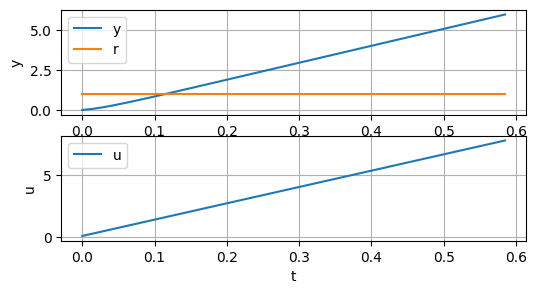

In [ ]:
plt.figure(figsize = (6,3))
plt.subplot(2,1,1)
plt.plot(t,y, label = 'y')
plt.plot(t,r, label = 'r')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.grid(True)
plt.subplot(2,1,2)
plt.plot(t,u, label = 'u')
plt.legend()
plt.xlabel('t')
plt.ylabel('u')
plt.grid(True)
plt.show()

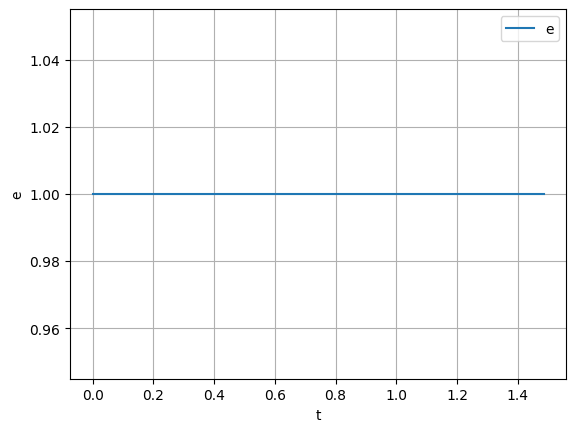

In [ ]:
plt.plot(t,r, label = 'e')
plt.legend()
plt.xlabel('t')
plt.ylabel('e')
plt.grid(True)
plt.show()

In [ ]:
for n in np.arange(0,Ns):
  if n == 0:
    y[n] = 0.0

  if n == 1:
     y[n] = 0.2368*r[n-1] + 0.6458*y[n-1]

  if n > 1:
    y[n] = 0.2368*r[n-1] + 0.05158*r[n-2] + 0.6458*y[n-1] - 0.006292*y[n-2]

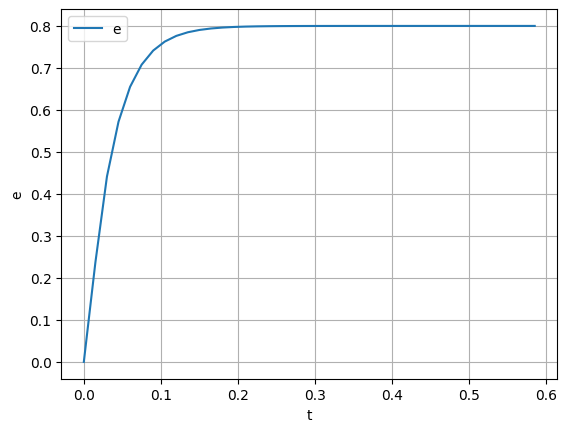

In [ ]:
plt.plot(t,y, label = 'e')
plt.legend()
plt.xlabel('t')
plt.ylabel('e')
plt.grid(True)
plt.show()